# Graded Challenge 3

## Perkenalan

- Nama : Elita Kabayeva
- Batch : 008

## Tujuan
1. Untuk membuat model Machine Learning dari Dataset yang diberikan dengan menggunakan Random Forest dan Boosting.
2. Membuat penarikan kesimpulan dari model yang telah dibuat.

## Import Libraries

Untuk memulai, pertama-tama kita harus mengimport libraries yang akan digunakan. Sebagai permulaan, berikut adalah libraries utama yang diimport:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

Kemudian, dataset yang akan digunakan di import. Pada kasus ini, dataset yang akan digunakan di assign ke variabel 'data' dan dibuat juga copy dari data tersebut sebagai backup

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data_ori = data.copy

Untuk mendapat gambaran awal dari data, kita melihat shapenya terlebih dahulu:

In [3]:
data.shape

(299, 13)

Lalu dilihat juga 5 data awal:

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Kemudian, menggunakan perintah data info, bisa dilihat nama-nama kolom, berapa jumlah missing value, dan tipe data dari masing-masing kolom:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Untuk mendapatkan gambaran awal yang lebih jelas mengenai missing value dari dataset ini, saya menggunakan persentase dari missing values:

In [6]:
percent_missing = (data.isnull().sum() * 100 / len(data)).round(2)
missing_value_data = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_data

,column_name,percent_missing
age,age,0.0
anaemia,anaemia,0.0
creatinine_phosphokinase,creatinine_phosphokinase,0.0
diabetes,diabetes,0.0
ejection_fraction,ejection_fraction,0.0
high_blood_pressure,high_blood_pressure,0.0
platelets,platelets,0.0
serum_creatinine,serum_creatinine,0.0
serum_sodium,serum_sodium,0.0
sex,sex,0.0


Kemudian, saya juga melihat persebaran statistik data untuk gambaran awal:

In [7]:
data.describe().T #ditranspose hanya karena personal preference

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


## Exploratory Data Analysis

Berikut ini adalah beberapa plotting dari data yang digunakan untuk keperluan _Exploratory Data Analysis_

### Living vs Died

Yang pertama kali di plotting disini adalah mengenai perbandingan dari pasien yang hidup dan yang meninggal.

Total number of Living case:- 203
Total number of Death case:- 96


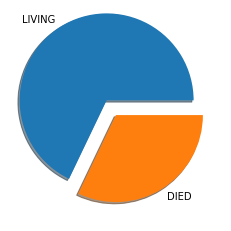

In [8]:
len_live = len(data['DEATH_EVENT'][data['DEATH_EVENT'] == 0])
len_death = len(data['DEATH_EVENT'][data['DEATH_EVENT'] == 1])

arr = np.array([len_live, len_death])
labels = ['LIVING','DIED']

print(f'Total number of Living case:- {len_live}')
print(f'Total number of Death case:- {len_death}')

plt.pie(arr, labels = labels, explode=[0.2,0.0], shadow = True)
plt.show()

Dari persebaran pada pie chart itu bisa dilihat bahwa pasien yang meninggal adalah 96 orang sedangkan yang bertahan hidup adalah 203 orang. Disini dapat disimpulkan bahwa pasien yang meninggal adalah 32% dari total pasien.

### Persebaran Umur Pasien

Kemudian saya juga memplot persebaran umur pasien.

<AxesSubplot:xlabel='age', ylabel='Density'>

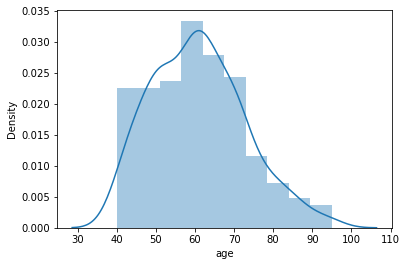

In [9]:
sns.distplot(data['age'])

Di dapatkan bahwa distribusi pasien paling banyak berada diatas umur 50

### Umur >50, Living vs Died

Karena dari plot sebelumnya didapatkan distribusi pasien puncaknya berada diatas umur 50, maka disini saya memplot jumlah pasien yang hidup dan yang meninggal dari umur 50 ke atas saja.

Total number of Died:- 85
Total number of Not Died:- 167


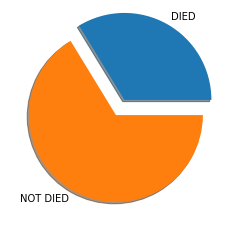

In [10]:
age_above_50_not_died = data['DEATH_EVENT'][data.age >=50][data.DEATH_EVENT == 0]
age_above_50_died = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 1]

len_died = len(age_above_50_died)
len_not_died = len(age_above_50_not_died)

arr1 = np.array([len_died, len_not_died])
labels =['DIED','NOT DIED']

print(f'Total number of Died:- {len_died}')
print(f'Total number of Not Died:- {len_not_died}')

plt.pie(arr1, labels=labels, explode = [0.2, 0.0], shadow= True)
plt.show()

Dari pie chart di dapatkan bahwa pasien tetap lebih banyak yang bertahan hidup.

### Diabetic, Living vs Died

Lalu juga diplot kecenderungan pasien yang memiliki penyakit komorbid berupa diabetes, apakah banyak yang bertahan hidup atau banyak yang tidak bertahan hidup.

Total number of Died with diabetes:- 40
Total number of Not died with diabetes: 118


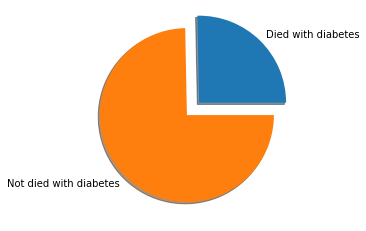

In [11]:
patient_nhave_diabetes_0 = data['DEATH_EVENT'][data.diabetes == 0][data.DEATH_EVENT ==0]
patient_have_diabetes_1 = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 1]

len_d_died = len(patient_have_diabetes_1)
len_d_alive = len(patient_nhave_diabetes_0)

arr2 = np.array([len_d_died, len_d_alive])
labels = ['Died with diabetes', 'Not died with diabetes']

print(f'Total number of Died with diabetes:- {len_d_died}')
print(f'Total number of Not died with diabetes: {len_d_alive}')

plt.pie(arr2, labels=labels, explode = [0.2,0.0], shadow = True)
plt.show()

Dari pie chart juga didapatkan bahwa pasien yang komorbid lebih banyak yang bertahan hidup

## Data Preprocessing

### Data Inference

Berikutnya saya akan memisahkan 10 data dari dataset awal. 10 data ini akan digunakan sebagai data inference.

Saya juga menghapus 10 data inference tadi dari data yang akan digunakan untuk train test dan mereset index data inference dan data train test. Reset index ini digunakan agar tidak terdapat permasalahan pada penomoran index nantinya.

In [12]:
data_inf = data.sample(10, random_state = 22)

#removing data_inf
data_train_test = data.drop(data_inf.index)

#reset index
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

### Split Dataset

Langkah berikutnya pada data preprocessing ini adalah untuk melakukan splitting pada dataset. Disini X merupakan features, atau kolom-kolom yang akan digunakan sebagai perhitungan dalam melakukan prediksi, dan Y merupakan target, atau hal yang akan di prediksi.

Karena yang akan diprediksi adalah Bertahan hidup atau Tidak, maka disini pada data yang diassign ke variabel X, saya mendelete kolom DEATH_EVENT (karena itu yang akan diprediksi) dan untuk y, isinya adalah kolom DEATH_EVENT.

In [13]:
# define X and Y
X = data_train_test.drop(['DEATH_EVENT'], axis=1)
y = data_train_test['DEATH_EVENT']

X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
284,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
285,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
286,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
287,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


Setelah dilakukan pendefinisian, dengan menggunakan fitur train test split, saya melakukan splitting pada dataset. Ada 4, yaitu X_train dan y_train sebagai data yang akan digunakan untuk latihan bagi model Machine Learning dan X_test serta y_test sebagai data yang digunakan untuk pengujian model Machine Learning.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 22, stratify=y)

print(X_train.shape)
print(X_test.shape)

(173, 12)
(116, 12)


### Handling Outliers

Berikutnya, dalam data cleaning yang dilakukan adalah menghandle outliers. Untuk handling outliers ini khusus hanya untuk X train saja.

Sebagai awalan, saya memprint info X train (yang sudah dihandle missing valuesnya) sebagai berikut:

In [15]:
X_train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

Kemudian, untuk deteksi outliers, saya menggunakan boxplot. Untuk itu, saya membuat fungsi diagnostic yang bisa digunakan untuk memprint boxplot:

In [16]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

Kemudian saya melakukan plotting untuk outliers :

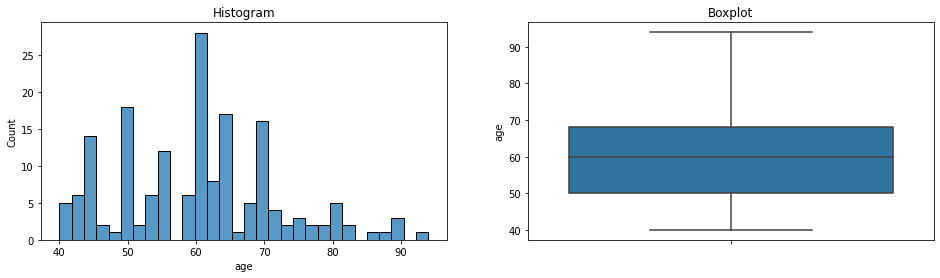

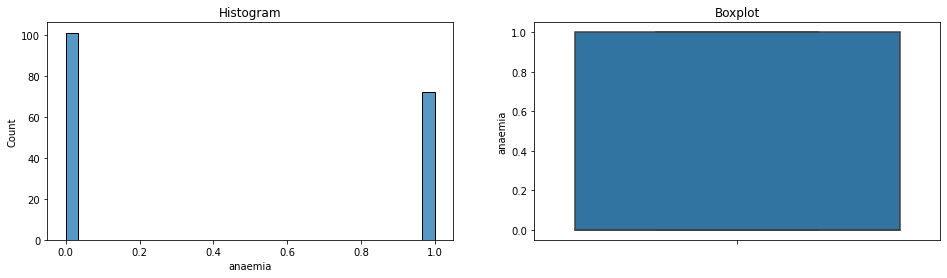

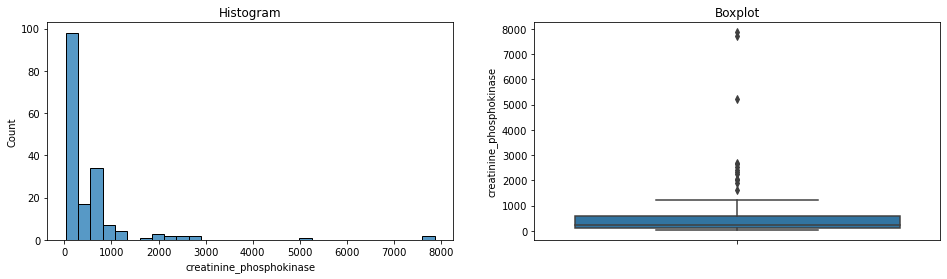

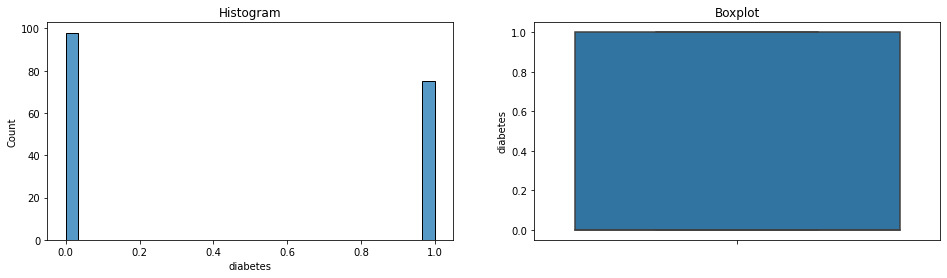

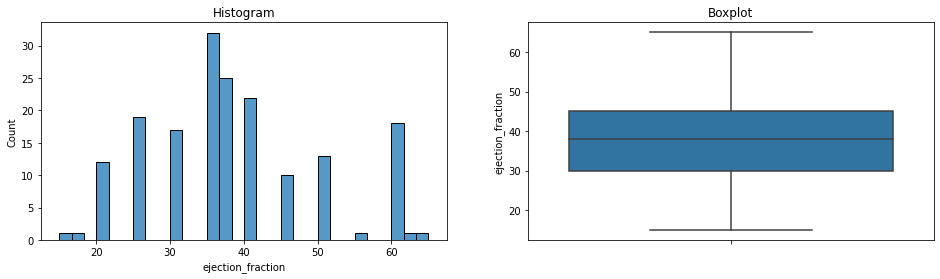

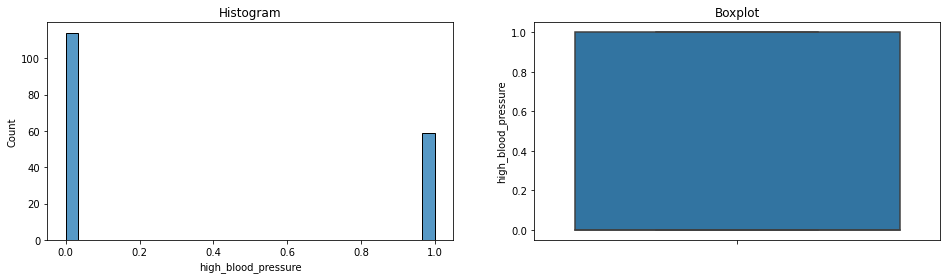

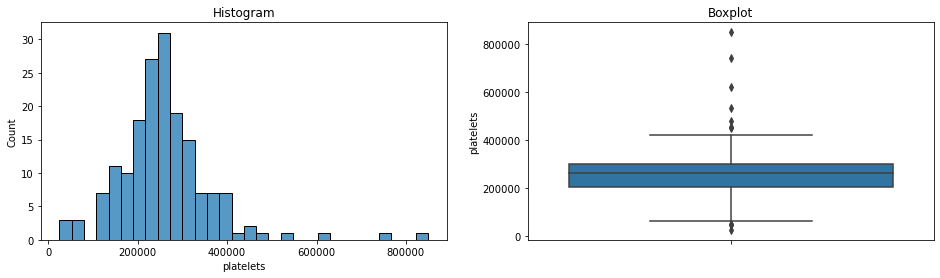

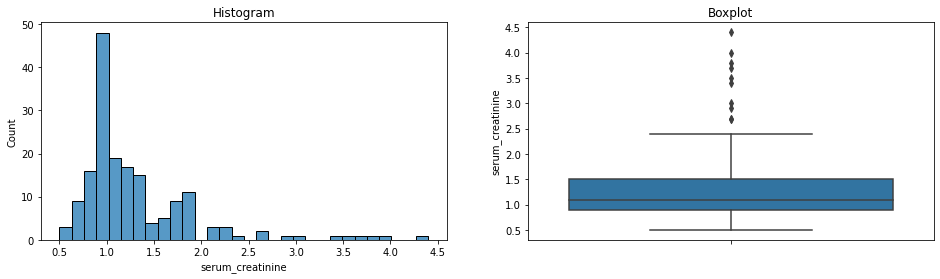

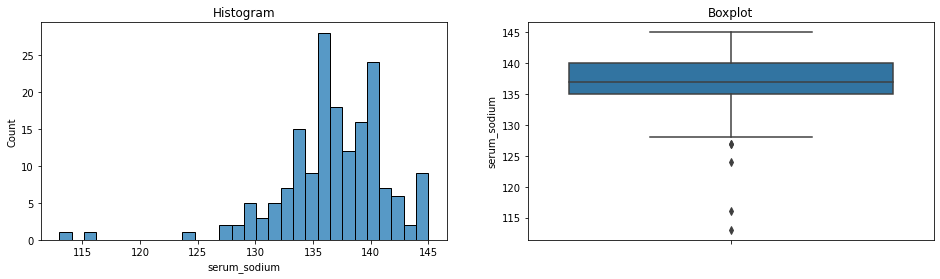

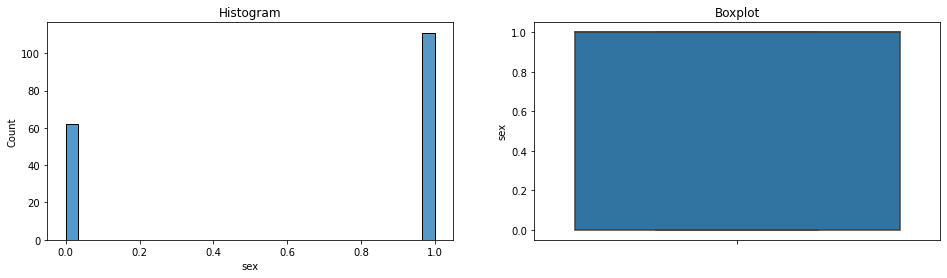

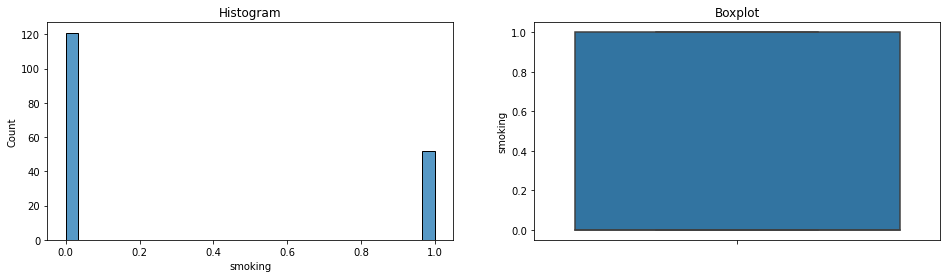

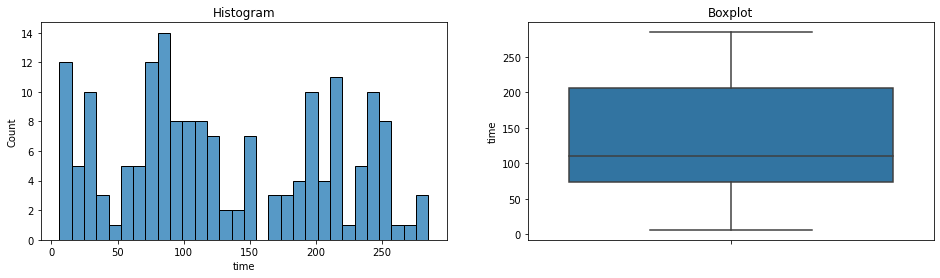

In [17]:
diagnostic_plots(X_train, 'age')
diagnostic_plots(X_train, 'anaemia')
diagnostic_plots(X_train, 'creatinine_phosphokinase')
diagnostic_plots(X_train, 'diabetes')
diagnostic_plots(X_train, 'ejection_fraction')
diagnostic_plots(X_train, 'high_blood_pressure')
diagnostic_plots(X_train, 'platelets')
diagnostic_plots(X_train, 'serum_creatinine')
diagnostic_plots(X_train, 'serum_sodium')
diagnostic_plots(X_train, 'sex')
diagnostic_plots(X_train, 'smoking')
diagnostic_plots(X_train, 'time')

Dari plotting boxplot terlihat bahwa, kolom yang memiliki outliers adalah kolom creatinine_phosphokinase, platelets, serum_creatinine, serum_sodium.

Handling outliers ini, saya akan menggunakan library Winsorizer sebagai berikut

In [18]:
from feature_engine.outliers import Winsorizer

cap = X_train[[ 'creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium']]

Saya mendefinisikan rule capping pada winsorizer :

In [19]:
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['creatinine_phosphokinase', 'platelets', 'serum_creatinine', 'serum_sodium'])

In [20]:
windsoriser.fit(cap)

cap_t = windsoriser.transform(cap)

Lalu memprint minimum capping dan maximum capping dari masing-masing variabel:

In [21]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'creatinine_phosphokinase': -600.5, 'platelets': 57000.0, 'serum_creatinine': 1.1102230246251565e-16, 'serum_sodium': 127.5}
Right Tail Caps :  {'creatinine_phosphokinase': 1291.5, 'platelets': 449000.0, 'serum_creatinine': 2.4, 'serum_sodium': 147.5}


Setelah untuk hasil before-after capping juga diprint :

In [22]:
print('Data - Before Capping')
print(cap.describe())
print('')
print('Data - After Capping')
print(cap_t.describe())

Data - Before Capping
       creatinine_phosphokinase      platelets  serum_creatinine  serum_sodium
count                173.000000     173.000000        173.000000    173.000000
mean                 545.300578  260268.615318          1.312948    136.768786
std                 1014.988488  105128.373154          0.657653      4.520465
min                   30.000000   25100.000000          0.500000    113.000000
25%                  109.000000  204000.000000          0.900000    135.000000
50%                  244.000000  262000.000000          1.100000    137.000000
75%                  582.000000  302000.000000          1.500000    140.000000
max                 7861.000000  850000.000000          4.400000    145.000000

Data - After Capping
       creatinine_phosphokinase      platelets  serum_creatinine  serum_sodium
count                173.000000     173.000000        173.000000    173.000000
mean                 392.546243  254828.730925          1.254566    136.945087
std     

Dan visualisasi boxplot before after:

creatinine_phosphokinase - Before Capping


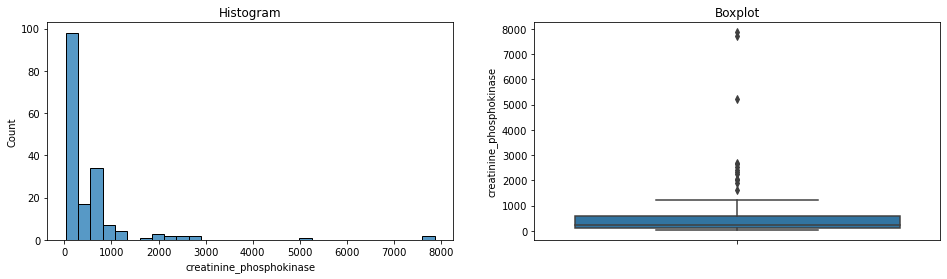


creatinine_phosphokinase - After Capping


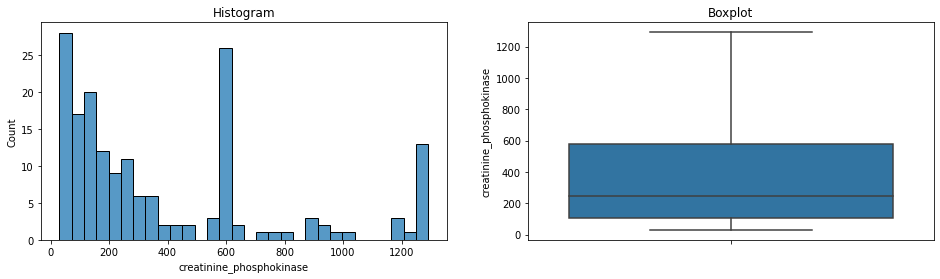

platelets - Before Capping


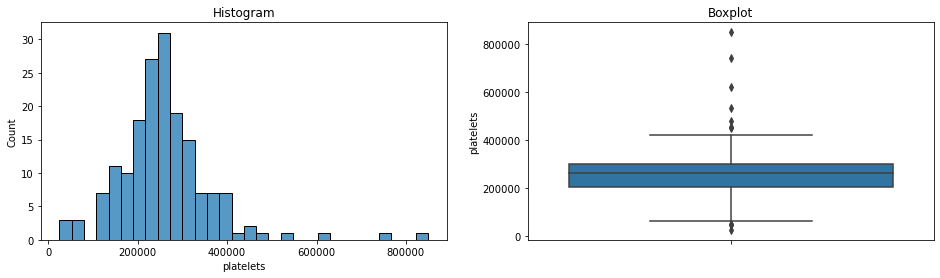


platelets - After Capping


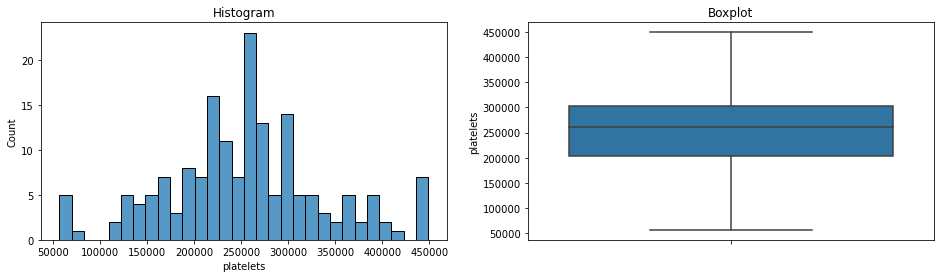

serum_creatinine - Before Capping


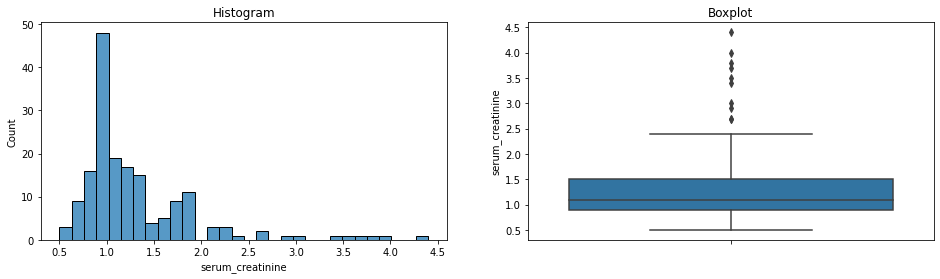


serum_creatinine - After Capping


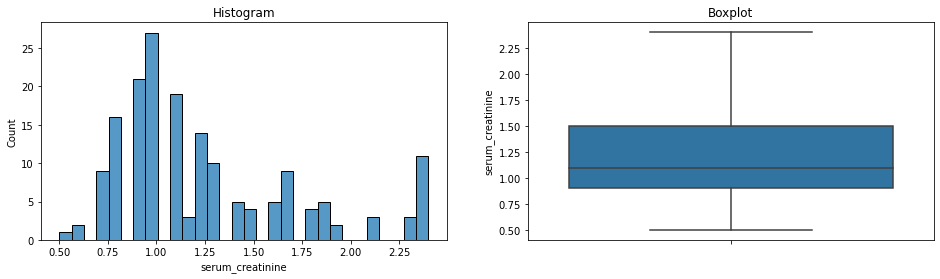

serum_sodium - Before Capping


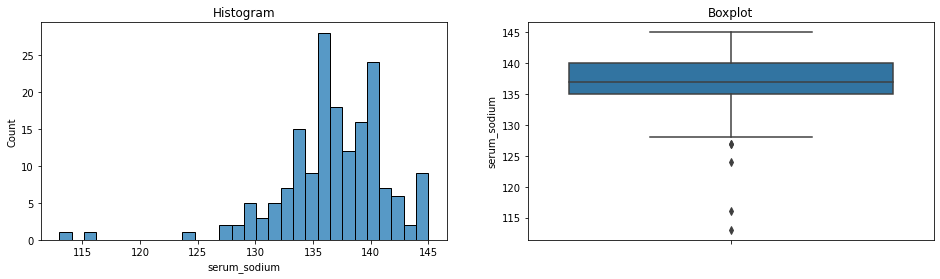


serum_sodium - After Capping


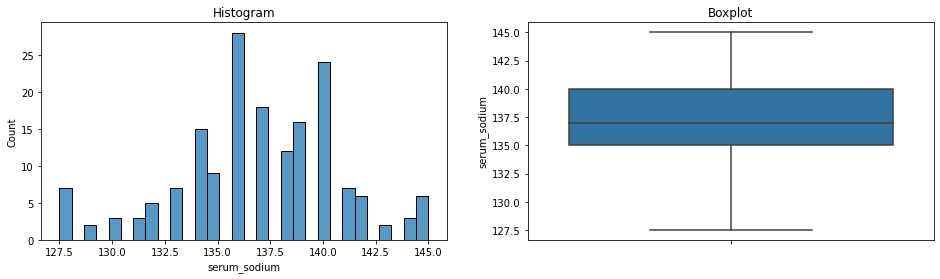

In [23]:
print('creatinine_phosphokinase - Before Capping')
diagnostic_plots(cap, 'creatinine_phosphokinase')
print('\ncreatinine_phosphokinase - After Capping')
diagnostic_plots(cap_t, 'creatinine_phosphokinase')

print('platelets - Before Capping')
diagnostic_plots(cap, 'platelets')
print('\nplatelets - After Capping')
diagnostic_plots(cap_t, 'platelets')

print('serum_creatinine - Before Capping')
diagnostic_plots(cap, 'serum_creatinine')
print('\nserum_creatinine - After Capping')
diagnostic_plots(cap_t, 'serum_creatinine')

print('serum_sodium - Before Capping')
diagnostic_plots(cap, 'serum_sodium')
print('\nserum_sodium - After Capping')
diagnostic_plots(cap_t, 'serum_sodium')

### Handling Missing Values

Berikutnya untuk handling missing values. Pada saat awal data loading tadi sudah sempat terlihat sekilas bahwa data ini tidak memiliki missing values sama sekali. 

Namun, akan di print ulang untuk masing-masing X_train, X_test, y_train, dan y_test untuk memastikan:

In [24]:
percent_missing = (X_train.isnull().sum() * 100 / len(X_train)).round(2)
missing_value_data = pd.DataFrame({'column_name': X_train.columns,
                                 'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing', ascending=False, inplace=True)
missing_value_data

,column_name,percent_missing
age,age,0.0
anaemia,anaemia,0.0
creatinine_phosphokinase,creatinine_phosphokinase,0.0
diabetes,diabetes,0.0
ejection_fraction,ejection_fraction,0.0
high_blood_pressure,high_blood_pressure,0.0
platelets,platelets,0.0
serum_creatinine,serum_creatinine,0.0
serum_sodium,serum_sodium,0.0
sex,sex,0.0


In [25]:
X_test.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
dtype: int64

In [26]:
y_test.isna().sum()

0

In [27]:
y_train.isna().sum()

0

Karena seluruh datanya bersih, maka akan langsung masuk ke rubrik berikutnya

## Splitting Numerical and Categorical

In [28]:
X_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
86,44.0,0,84,1,40,1,235000.0,0.7,139,1,0,79
240,53.0,0,207,1,40,0,223000.0,1.2,130,0,0,214
101,42.0,0,5209,0,30,0,226000.0,1.0,140,1,1,87
5,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8
283,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270


Dari print data X_train diatas, dapat dilihat bahwa seluruh features dari data ini sudah berupa numerik. 

Untuk memastikan akan dilakukan assignment ke masing-masing numerik columns dan categorical columns sebagai berikut:

In [29]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

In [30]:
print('Numeric Columns :', num_columns)
print('Categorical Columns : ', cat_columns)

Numeric Columns : ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
Categorical Columns :  []


Bisa dilihat semua datanya sudah masuk ke kolom numerik sehingga proses splitting tidak dilakukan.

## Feature Engineering

Berikutnya, akan langsung dilakukan feature engineering dengan menggunakan fitur SelectKBest untuk menentukan mana feature yang paling berpengaruh:

In [31]:
from sklearn.feature_selection import SelectPercentile, f_classif, chi2, SelectKBest, SelectFpr

# Select features according to the k(=15) highest scores.

selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X_train, y_train)
cols = selector.get_support(indices=True)
best_features = X_train.iloc[:,cols]
list(best_features.columns)

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'time']

Dari hasil selection tersebut, terlihat ada 10 feature yang paling memengaruhi. Sehingga saya akan menghapus kolom lainnya:

In [32]:
X_train.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [33]:
X_train_cd = X_train.drop(columns=['creatinine_phosphokinase', 'diabetes'])
X_test_cd = X_test.drop(columns=['creatinine_phosphokinase', 'diabetes'])

In [34]:
X_train_cd

,age,anaemia,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
86,44.000,0,40,1,235000.0,0.7,139,1,0,79
240,53.000,0,40,0,223000.0,1.2,130,0,0,214
101,42.000,0,30,0,226000.0,1.0,140,1,1,87
5,90.000,1,40,1,204000.0,2.1,132,1,1,8
283,63.000,1,35,0,179000.0,0.9,136,1,1,270
...,...,...,...,...,...,...,...,...,...,...
179,60.667,1,30,0,389000.0,1.5,136,1,0,171
288,50.000,0,45,0,395000.0,1.6,136,1,1,285
133,68.000,1,25,0,305000.0,2.1,130,1,0,108
20,65.000,1,25,1,276000.0,1.3,137,0,0,16


### Scaling

Setelah kolom-kolom tersebut di hapus, barulah data ini saya lakukan scaling:

In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaleds = scaler.fit_transform(X_train_cd)
X_test_scaleds = scaler.transform(X_test_cd)

Dengan ini sudah selesai tahapan data preprocessing. Saya akan masuk ke pemodelan.

# Random Forest

Untuk dataseti ini, diminta melakukan modeling dengan menggunakan Random Forest dan Boosting. Saya akan menggunakan Random Forest terlebih dahulu.

## Random Forest Classifier Base Model

Random Forest yang digunakan adalah jenis Classifier karena dataset ini merupakan binary classification yang targetnya berupa 0 atau 1 (Hidup atau Meninggal).

Saya akan melakukan modeling dengan Base Model pada Random Forest Classifier sebelum melakukan modeling dengan hyperparameter tuning.

### Model Training

Sebagai permulaan saya akan melakukan _import library_ yang digunakan dan melakukan model traning

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

Lalu melakukan training pada train set

In [37]:
rf.fit(X_train_scaleds, y_train)

RandomForestClassifier()

### Model Evaluation

Setelah melakukan model traning, saya melakukan model evaluation. Disini saya menggunakan accuracy score, cross validate, dan classification report, serta recall score:

In [38]:
from sklearn.metrics import accuracy_score
print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(rf.score(X_train_scaleds, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(rf.score(X_test_scaleds, y_test)))

pred = rf.predict(X_test_scaleds)
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 0.83
Accuracy Score: 0.8275862068965517


In [39]:
from sklearn.model_selection import cross_validate

cv_results_rf = cross_validate(rf, X_train_scaleds,y_train, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_rf['test_score'].mean()}")

cv_results_rf_test = cross_validate(rf, X_test_scaleds,y_test, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_rf_test['test_score'].mean()}")

Average score of Train Cross Validation is 0.8203361344537816
Average score of Test Cross Validation is 0.8445652173913043


In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        79
           1       0.69      0.84      0.76        37

    accuracy                           0.83       116
   macro avg       0.80      0.83      0.81       116
weighted avg       0.84      0.83      0.83       116



In [41]:
from sklearn.metrics import recall_score

print("Recall: %f "%recall_score(y_test, pred))

Recall: 0.837838 


## Random Forest Classifier GridSearchCV

Berikutnya saya akan mencoba melakukan Hyperparameter Tuning dari algoritma Random Forest classifier ini dengan menggunakan GridSearchCV.

### Model Training

Seperti biasa, akan dilakukan _import library_ yang dibutuhkan

In [42]:
from sklearn.ensemble import RandomForestClassifier

#Create Classifiers
rfs = RandomForestClassifier()

Lalu melakukan definisi dari parameter dan menjalankan hyperparameter tuning :

In [43]:
params_rf = {'n_estimators' : [5,20,50,100],
          'max_features' : ['auto', 'sqrt'],
            'min_samples_split' : [2,5,10],
            'min_samples_leaf' : [10,20,50,100],
            'bootstrap':[True, False]}

In [44]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator = rfs, param_grid = params_rf, cv=4, verbose=1, scoring="accuracy")

In [45]:
%%time
rf_grid.fit(X_train_scaleds, y_train)

Fitting 4 folds for each of 192 candidates, totalling 768 fits
Wall time: 29.3 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [10, 20, 50, 100],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [46]:
# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_grid.best_params_))
print("Best score is {}".format(rf_grid.best_score_))

Tuned Random Forest Parameters: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 5}
Best score is 0.8668076109936574


Lalu melakukan model traning dengan parameter yang telah di tuning :

In [47]:
rfbest = RandomForestClassifier(n_estimators = rf_grid.best_params_['n_estimators'],
                                max_features = rf_grid.best_params_['max_features'],
                                min_samples_split = rf_grid.best_params_['min_samples_leaf'],
                                min_samples_leaf = rf_grid.best_params_['min_samples_leaf'],
                                bootstrap = rf_grid.best_params_['bootstrap'])

In [48]:
rfbest.fit(X_train_scaleds,y_train)

RandomForestClassifier(bootstrap=False, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=5)

### Model Evaluation

Setelah melakukan model traning, saya melakukan model evaluation. Disini saya menggunakan accuracy score, cross validate, dan classification report, serta recall score:

In [49]:
from sklearn.metrics import accuracy_score
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rfbest.score(X_train_scaleds, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rfbest.score(X_test_scaleds, y_test)))

pred = rfbest.predict(X_test_scaleds)
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy of Random Forest classifier on training set: 0.90
Accuracy of Random Forest classifier on test set: 0.83
Accuracy Score: 0.8275862068965517


In [50]:
from sklearn.model_selection import cross_validate

cv_results_rf = cross_validate(rfbest, X_train_scaleds,y_train, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_rf['test_score'].mean()}")

cv_results_rf_test = cross_validate(rfbest, X_test_scaleds,y_test, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_rf_test['test_score'].mean()}")

Average score of Train Cross Validation is 0.8258823529411764
Average score of Test Cross Validation is 0.8271739130434783


In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        79
           1       0.71      0.78      0.74        37

    accuracy                           0.83       116
   macro avg       0.80      0.82      0.81       116
weighted avg       0.83      0.83      0.83       116



In [53]:
from sklearn.metrics import recall_score

print("Recall: %f "%recall_score(y_test, pred))

Recall: 0.783784 


## Model Inference

Untuk model inference saya akan menggunakan algoritma Random Forest Classifier yang dengan hyperparameter tuning

Berikut adalah data inference yang sebelumnya telah dipisahkan dari data training dan testing:

In [54]:
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,85.0,0,129,0,60,0,306000.00,1.20,132,1,1,90,1
1,70.0,1,75,0,35,0,223000.00,2.70,138,1,1,54,0
2,60.0,1,1082,1,45,0,250000.00,6.10,131,1,0,107,0
3,45.0,0,308,1,60,1,377000.00,1.00,136,1,0,186,0
4,50.0,0,124,1,30,1,153000.00,1.20,136,0,1,32,1
5,50.0,1,1051,1,30,0,232000.00,0.70,136,0,0,246,0
6,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
7,55.0,1,180,0,45,0,263358.03,1.18,137,1,1,211,0
8,50.0,0,1846,1,35,0,263358.03,1.18,137,1,1,119,0
9,72.0,0,233,0,45,1,235000.00,2.50,135,0,0,115,1


In [55]:
data_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       10 non-null     float64
 1   anaemia                   10 non-null     int64  
 2   creatinine_phosphokinase  10 non-null     int64  
 3   diabetes                  10 non-null     int64  
 4   ejection_fraction         10 non-null     int64  
 5   high_blood_pressure       10 non-null     int64  
 6   platelets                 10 non-null     float64
 7   serum_creatinine          10 non-null     float64
 8   serum_sodium              10 non-null     int64  
 9   sex                       10 non-null     int64  
 10  smoking                   10 non-null     int64  
 11  time                      10 non-null     int64  
 12  DEATH_EVENT               10 non-null     int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 KB


Karena data ini tidak ada jenis yang berupa kategorikal, saya akan langsung melakukan drop columns pada kolom-kolom yang juga di drop pada data train test sebelumnya (karena memanfaatkan feature scaling).

In [56]:
data_inf_cd = data_inf.drop(columns=['creatinine_phosphokinase', 'diabetes', 'DEATH_EVENT'])

Kemudian saya melakukan scaling pada data inference ini:

In [57]:
scaler = StandardScaler()
scaler.fit(X_train_scaleds)

StandardScaler()

In [58]:
data_inf_fin = scaler.transform(data_inf_cd)

## Predict Model Inference

Menggunakan data inference yang telah di prepare ini, saya melakukan predict dengan menggunakan algoritma Random Forest Classifier dengan Hyperparameter Tuning dan menunjukkan hasil prediksinya:

In [59]:
#predict model inference

y_pred_inf = rfbest.predict(data_inf_fin)
y_pred_inf = pd.DataFrame(y_pred_inf, columns = ['DEATH - Prediction'])
y_pred_inf

,DEATH - Prediction
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


Hasil prediksi tersebut kemudian saya gabungkan dengan dataset inference awal;

In [60]:
##Concate  to Original Inference - Set

pd.concat([data_inf, y_pred_inf], axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,DEATH - Prediction
0,85.0,0,129,0,60,0,306000.00,1.20,132,1,1,90,1,1
1,70.0,1,75,0,35,0,223000.00,2.70,138,1,1,54,0,1
2,60.0,1,1082,1,45,0,250000.00,6.10,131,1,0,107,0,1
3,45.0,0,308,1,60,1,377000.00,1.00,136,1,0,186,0,1
4,50.0,0,124,1,30,1,153000.00,1.20,136,0,1,32,1,1
5,50.0,1,1051,1,30,0,232000.00,0.70,136,0,0,246,0,1
6,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0,1
7,55.0,1,180,0,45,0,263358.03,1.18,137,1,1,211,0,1
8,50.0,0,1846,1,35,0,263358.03,1.18,137,1,1,119,0,1
9,72.0,0,233,0,45,1,235000.00,2.50,135,0,0,115,1,1


# Gradient Boosting Classifier (GBC)

Berikutnya untuk boosting, saya akan menggunakan algoritma Gradient Boosting Classifier.

## Model Training

Sama seperti sebelumnya, saya mengimport terlebih dahulu library yang dibutuhkan

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

Lalu mendefinisikan parameternya dan melakukan tuning dengan GridSearchCV:

In [62]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,10,50,250],
    "max_depth":[1,3,5,7, 9],
    "learning_rate":[0.01,0.1,1, 10]}

In [63]:
gbcv = GridSearchCV(gbc,param_grid = parameters,cv=5, scoring="accuracy")

In [64]:
%%time
gbcv.fit(X_train_scaleds, y_train)

Wall time: 21.1 s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 10, 50, 250]},
             scoring='accuracy')

In [65]:
# Print the tuned parameters and score
print("Tuned Gradient Boosting Classifier Parameters: {}".format(gbcv.best_params_)) 

print("Best score is {}".format(gbcv.best_score_))

Tuned Gradient Boosting Classifier Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 5}
Best score is 0.8438655462184874


Kemudian, melakukan training dengan parameter yang telah dituning sebelumnya:

In [66]:
gbcbest = GradientBoostingClassifier(learning_rate = gbcv.best_params_['learning_rate'],
                                max_depth = gbcv.best_params_['max_depth'],
                                n_estimators = gbcv.best_params_['n_estimators'])

In [67]:
gbcbest.fit(X_train_scaleds,y_train)

GradientBoostingClassifier(n_estimators=5)

## Model Evaluation

Setelah melakukan model traning, saya melakukan model evaluation. Disini saya menggunakan accuracy score, cross validate, dan classification report, serta recall score:

In [68]:
from sklearn.metrics import accuracy_score
print('Accuracy of Gradient Boost Classifier on training set: {:.2f}'.format(gbcbest.score(X_train_scaleds, y_train)))
print('Accuracy of Gradient Boost Classifier on test set: {:.2f}'.format(gbcbest.score(X_test_scaleds, y_test)))

pred = gbcbest.predict(X_test_scaleds)
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy of Gradient Boost Classifier on training set: 0.88
Accuracy of Gradient Boost Classifier on test set: 0.84
Accuracy Score: 0.8362068965517241


In [69]:
from sklearn.model_selection import cross_validate

cv_results_gbc = cross_validate(gbcbest, X_train_scaleds,y_train, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_gbc['test_score'].mean()}")

cv_results_gbc_test = cross_validate(gbcbest, X_test_scaleds,y_test, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_gbc_test['test_score'].mean()}")

Average score of Train Cross Validation is 0.8438655462184874
Average score of Test Cross Validation is 0.8018115942028985


In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        79
           1       0.85      0.59      0.70        37

    accuracy                           0.84       116
   macro avg       0.84      0.77      0.79       116
weighted avg       0.84      0.84      0.83       116



In [71]:
from sklearn.metrics import recall_score

print("Recall: %f "%recall_score(y_test, pred))

Recall: 0.594595 


Dari hasil evaluasi ini, baik dari accuracy score, cross validation, maupun classification report, dapat dilihat bahwa hasil prediksi menggunakan Gradient Boosting Classifier jauh lebih baik daripada menggunakan Random Forest Classifier. Meskipun nilai Recall masih paling baik dimiliki oleh Random Forest Classifier.

# Adaboost Classifier

Sebagai tambahan, saya juga mencoba menggunakan AdaBoost Classifier

## Model Training

Saya kembali mengimport library yang dibutuhkan:

In [72]:
from sklearn.ensemble import AdaBoostClassifier

In [73]:
abc = AdaBoostClassifier()
parameters_1 = {
    "n_estimators":[5,10,50,250],
    "learning_rate":[0.01,0.1,1, 10],
    "algorithm":['SAMME', 'SAMME.R']}

Lalu melakukan hyperparameter tuning dengan GridSearchCV

In [74]:
abcv = GridSearchCV(abc,param_grid = parameters_1,cv=5, scoring="accuracy")

In [75]:
%%time
abcv.fit(X_train_scaleds, y_train)

Wall time: 11.2 s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [5, 10, 50, 250]},
             scoring='accuracy')

In [89]:
# Print the tuned parameters and score
print("Tuned AdaBoost Classifier Parameters: {}".format(abcv.best_params_)) 

print("Best score is {}".format(abcv.best_score_))

Tuned AdaBoost Classifier Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 250}
Best score is 0.8435294117647059


Kemudian, melakukan training dengan parameter yang telah di tuning sebelumnya:

In [77]:
abcbest = AdaBoostClassifier(learning_rate = abcv.best_params_['learning_rate'],
                                algorithm = abcv.best_params_['algorithm'],
                                n_estimators = abcv.best_params_['n_estimators'])

In [78]:
abcbest.fit(X_train_scaleds,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=250)

## Model Evaluation

Setelah melakukan model traning, saya melakukan model evaluation. Disini saya menggunakan accuracy score, cross validate, dan classification report, serta recall score:

In [90]:
from sklearn.metrics import accuracy_score
print('Accuracy of AdaBoost Classifier on training set: {:.2f}'.format(abcbest.score(X_train_scaleds, y_train)))
print('Accuracy of AdaBoost Boost Classifier on test set: {:.2f}'.format(abcbest.score(X_test_scaleds, y_test)))

pred = abcbest.predict(X_test_scaleds)
print("Accuracy Score: {}".format(accuracy_score(y_test, pred)))

Accuracy of AdaBoost Classifier on training set: 0.87
Accuracy of AdaBoost Boost Classifier on test set: 0.85
Accuracy Score: 0.853448275862069


In [80]:
from sklearn.model_selection import cross_validate

cv_results_abc = cross_validate(abcbest, X_train_scaleds,y_train, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Train Cross Validation is {cv_results_abc['test_score'].mean()}")

cv_results_abc_test = cross_validate(abcbest, X_test_scaleds,y_test, scoring=('accuracy'), return_train_score=True)
print(f"Average score of Test Cross Validation is {cv_results_abc_test['test_score'].mean()}")

Average score of Train Cross Validation is 0.8435294117647059
Average score of Test Cross Validation is 0.8615942028985508


In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        79
           1       0.86      0.65      0.74        37

    accuracy                           0.85       116
   macro avg       0.85      0.80      0.82       116
weighted avg       0.85      0.85      0.85       116



In [82]:
from sklearn.metrics import recall_score

print("Recall: %f "%recall_score(y_test, pred))

Recall: 0.648649 


Dari hasil evaluasi ini, baik dari akurasi maupun recall score, dapat dlihat bahwa AdaBoost Classifier tidak memberikan nilai yang lebih baik dari Gradient Boosting Classifier.

## Model Inference

Kemudian, masuk ke model inference. Saya menggunakan algoritma AdaBoost Classifier pada model inference ini. Berikut adalah data inference yang sebelumnya telah dipisahkan dari data training dan testing:

In [83]:
data_inf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,85.0,0,129,0,60,0,306000.00,1.20,132,1,1,90,1
1,70.0,1,75,0,35,0,223000.00,2.70,138,1,1,54,0
2,60.0,1,1082,1,45,0,250000.00,6.10,131,1,0,107,0
3,45.0,0,308,1,60,1,377000.00,1.00,136,1,0,186,0
4,50.0,0,124,1,30,1,153000.00,1.20,136,0,1,32,1
5,50.0,1,1051,1,30,0,232000.00,0.70,136,0,0,246,0
6,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0
7,55.0,1,180,0,45,0,263358.03,1.18,137,1,1,211,0
8,50.0,0,1846,1,35,0,263358.03,1.18,137,1,1,119,0
9,72.0,0,233,0,45,1,235000.00,2.50,135,0,0,115,1


Seperti sebelumnya, saya melakukan drop columns pada kolom-kolom yang di drop pada data train test

In [84]:
data_inf_c = data_inf.drop(columns=['creatinine_phosphokinase', 'diabetes', 'DEATH_EVENT'])

dan langsung masuk ke scaling (karena data ini tidak memiliki kolom kategorikal untuk di encoding)

In [85]:
scaler = StandardScaler()
scaler.fit(X_train_scaleds)

StandardScaler()

In [86]:
data_inf_fins = scaler.transform(data_inf_c)

## Predict Model Inference

Menggunakan data inference yang telah di prepare ini, saya melakukan predict dengan menggunakan algoritma Gradient Boosting Classifier dan menunjukkan hasil prediksinya:

In [91]:
#predict model inference

y_pred_infs = abcbest.predict(data_inf_fins)
y_pred_infs = pd.DataFrame(y_pred_infs, columns = ['DEATH - Prediction'])
y_pred_infs

,DEATH - Prediction
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


Hasil prediksi tersebut kemudian saya gabungkan dengan dataset inference awal;

In [92]:
##Concate  to Original Inference - Set

pd.concat([data_inf, y_pred_infs], axis=1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,DEATH - Prediction
0,85.0,0,129,0,60,0,306000.00,1.20,132,1,1,90,1,0
1,70.0,1,75,0,35,0,223000.00,2.70,138,1,1,54,0,0
2,60.0,1,1082,1,45,0,250000.00,6.10,131,1,0,107,0,0
3,45.0,0,308,1,60,1,377000.00,1.00,136,1,0,186,0,0
4,50.0,0,124,1,30,1,153000.00,1.20,136,0,1,32,1,0
5,50.0,1,1051,1,30,0,232000.00,0.70,136,0,0,246,0,0
6,65.0,0,582,1,30,0,249000.00,1.30,136,1,1,212,0,0
7,55.0,1,180,0,45,0,263358.03,1.18,137,1,1,211,0,0
8,50.0,0,1846,1,35,0,263358.03,1.18,137,1,1,119,0,0
9,72.0,0,233,0,45,1,235000.00,2.50,135,0,0,115,1,0


# Analysis

## Model Analysis

### Model Accuracy Analysis

Pada model analysis ini, digunakan tiga algoritma yang berbeda yaitu Random Forest Classifier (dengan menggunakan 2 approach pada Random Forest classifier, yang pertama dengan base model dan yang kedua dengan hyperparameter tuning) dan Gradient Boost Classifier serta AdaBoost Classifier.

Ada satu hal yang perlu di garisbawahi dari model yang dibuat ini. Yaitu pada saat melakukan training dengan menggunakan base model dari Random Forest Classifier.

Pada saat dilakukan evaluasi dengan accuracy score, didapatkan persebaran sebagai berikut:

- Accuracy of Random Forest Classifier on training set: 1.00
- Accuracy of Random Forest Classifier on test set: 0.83
- Accuracy Score: 0.8275862068965517

Nilai 100% accuracy adalah hal yang tidak mungkin. Sehingga ini memberikan suatu indikasi bahwa bisa jadi ada permasalahan pada outliers atau ada permasalahan pada saat melakukan feature engineering

Namun, pada saat melakukan training kedua menggunakan Random Forest Classifier yang diberikan tuning hyperparameter sebelumnya, nilai accuracy maupun cross validation serta classification reportnya seluruhnya tidak memberikan nilai yang aneh. Secara keseluruhan nilai akurasinya dan cross validationnya kurang lebih sama dengan nilai pada Random Forest Classifier Base Model. Tetapi tidak ada nilai 100% yang aneh tersebut.

Sehingga ini menjadi menarik untuk ditinjau lebih lanjut. Terutama setelah dilakukan training ketiga dengan menggunakan Gradient Boosting Classifier yang mana walaupun nilai akurasinya tetap berkisar pada rentang yang sama, namun tidak ada kecenderungan overfitting.

Pada training keempat dengan menggunakan AdaBoost Classifier, nilai akurasinya naik menjadi pada rentang 85% dan tidak terdapat kecenderungan overfitting.

Sampai disini yang bisa ditarik kesimpulan adalah, data harus ditinjau ulang penanganan outliersnya dan bisa jadi random forest classifier bukanlah algoritma yang tepat untuk dataset ini. Bisa dilakukan evaluasi ulang dengan memanfaatkan Bagging dari ensemble learning.

### Model Recall Score Analysis

Dataset ini merupakan dataset kesehatan yang berupa prediksi apakah seorang pasien bertahan hidup atau meninggal dunia karena gagal jantung. Sangat krusial untuk memerhatikan nilai Recallnya yang menunjukkan adanya false negative, yaitu salah prediksi bahwa seorang pasien akan bertahan hidup padahal pada kenyataannya meninggal.

Dari keempat model ini berikut adalah persebaran nilai Recallnya :
- Base Model Random Forest Classifier : 83,78%
- Tuned Random Forest Classifier : 78,37%
- Tuned Gradient Boosting Classifier : 59,45%
- Tuned AdaBoost Classifier : 64,86%

Disini terlihat bahwa Base Model dari Random Forest Classifier memiliki nilai recall yang paling tinggi, menunjukkan tingkat false negative yang paling rendah. Tapi perlu diingat bahwa, akurasi dari Base Model Random Forest ini bukan yang tertinggi.

Akurasi paling tinggi dipegang oleh AdaBoost Classifier. 

Disini bisa disimpulkan bahwa harus dicari titik tengah model yang bisa memberikan nilai recall dan akurasi yang optimum. Karena jika hanya salah satu yang tinggi, model ini tetap saja tidak bisa dijadikan acuan.

## Overall Analysis

Dataset dan pemodelan masih bisa dilakukan peninjauan dan evaluasi ulang untuk meningkatkan akurasi dan recall scorenya. 

Akurasi terbaik adalah sebesar 85% menggunakan AdaBoost Classifier. Namun ini masih belum cukup akurat untuk model bisa memprediksi kemungkinan bertahan hidup atau meninggal dari pasien cardiac arrest ini karena beberapa hal sebagai berikut:

- Dari EDA pada dataset diketahui bahwa pasien yang meninggal akibat gagal jantung adalah sebanyak 31% dari total pasien (299 orang). Ini berarti 203 pasien bertahan hidup. Dengan akurasi model sebesar 85%, dari 299 total pasien, akan ada 45 orang (atau 15%) yang salah di prediksi apakah ia akan bertahan hidup atau tidak. 
- Merujuk dari data pasien bahwa 31% berakhir meninggal, angka 15% salah prediksi ini akan bisa berkontribusi meningkatkan jumlah kematian pasien, karena dalam banyak kasus gagal jantung, terjadinya gagal jantung ini merupakan efek dari banyaknya komplikasi seperti umur dan penyakit komorbid, yang jika salah prosedur penanganan dan hipotesis, akan berakibat fatal (kematian). Dari EDA diketahui bahwa kebanyakan pasien adalah usia lanjut dan memiliki penyakit komorbid. Sehingga angka 85% akurasi ini sangat penting untuk ditingkatkan.

Pertimbangan mengenai nilai akurasi tersebut juga didukung oleh nilai recall yang sama sekali belum ditemukan nilai yang memuaskan dari keempat model yang telah digunakan tadi. Karena nilai recall berpengaruh pada tingkat false negative yang mana, False Negative adalah  salah prediksi bahwa seorang pasien akan bertahan hidup padahal pada kenyataannya meninggal.  Nilai recall yang rendah bisa menyebabkan salah diagnosa. 

Sejauh ini nilai recall tertinggi adalah 83,78% yang berarti masih membuka kemungkinan adanya 48 orang (atau 16% dari 299 pasien) yang salah di diagnosis.